Decision boundary of label propagation versus SVM on the Iris dataset

https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_versus_svm_iris.html#sphx-glr-auto-examples-semi-supervised-plot-label-propagation-versus-svm-iris-py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.semi_supervised import LabelSpreading

In [2]:
rng = np.random.RandomState(0)
rng

RandomState(MT19937) at 0x1E811230888

In [3]:
iris = datasets.load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [6]:
X = iris.data[:, :2]
y = iris.target

In [7]:
X.shape, y.shape

((150, 2), (150,))

In [8]:
# step size in the mesh
h = .02

In [9]:
# 30%的数据，无label
y_30 = np.copy(y)
y_30[rng.rand(len(y)) < 0.3] = -1

In [10]:
# rng.rand(len(y)) # 0-1之间的随机数 均匀分布

In [11]:
# 50%的数据，无label
y_50 = np.copy(y)
y_50[rng.rand(len(y)) < 0.5] = -1

In [12]:
# 训练
ls30 = (LabelSpreading().fit(X, y_30), y_30)
ls50 = (LabelSpreading().fit(X, y_50), y_50)
ls100 = (LabelSpreading().fit(X, y), y)
rbf_svc = (svm.SVC(kernel='rbf', gamma=.5).fit(X, y), y)

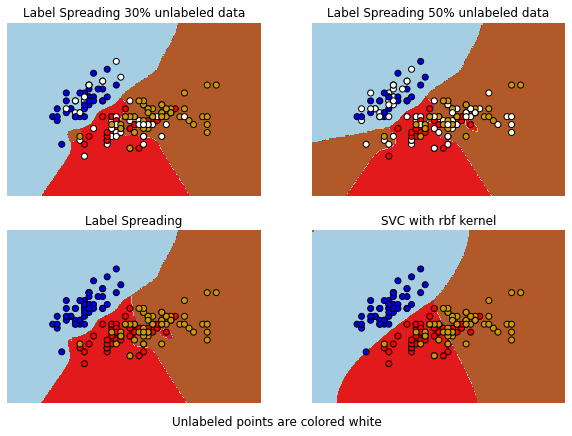

In [13]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['Label Spreading 30% unlabeled data',
          'Label Spreading 50% unlabeled data',
          'Label Spreading',
          'SVC with rbf kernel']

color_map = {-1: (1, 1, 1), 0: (0, 0, .9), 1: (1, 0, 0), 2: (.8, .6, 0)}
plt.figure(figsize=(10, 7))
for i, (clf, y_train) in enumerate((ls30, ls50, ls100, rbf_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis('off')

    # Plot also the training points
    colors = [color_map[y] for y in y_train]
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='black')

    plt.title(titles[i])

plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()